<a href="https://colab.research.google.com/github/gzguevara/amex_kaggle/blob/master/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [ ]:
import pandas as pd
import numpy  as np 

import sys

import matplotlib.pyplot as plt, gc, os
import plotly.express as px
import seaborn as sns

import random
import itertools

# Paths
targets_dir = '/content/drive/MyDrive/KaggleAMEX/Data/train_labels.csv'
train_dir   = '/content/drive/MyDrive/KaggleAMEX/Data/train.parquet'
test_dir    = '/content/drive/MyDrive/KaggleAMEX/Data/test.parquet'
sample_dir  = '/content/drive/MyDrive/KaggleAMEX/Data/sample_submission.csv'
model_dir   = '/content/drive/MyDrive/KaggleAMEX/Models'
impor_dir   = '/content/drive/MyDrive/KaggleAMEX/Importance'
results_dir = '/content/drive/MyDrive/KaggleAMEX/Results'

#Parameters
SEED, NAN_VALUE = 42, -1

#Get numerical and catecorical columns 
cat_features = ['B_30', 'B_38', 'D_117', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'R_2', 'S_6', 'R_4', 'R_15', 'S_18', 'D_86', 'D_87', 'B_31', 'R_19', 'B_32', 'S_20', 'R_21', 'R_22', 'R_23', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'D_127', 'R_28', 'B_33', 'D_92', 'D_103', 'R_27', 'D_109', 'D_114', 'D_116', 'D_120', 'D_129', 'D_135', 'D_137', 'D_139', 'D_140', 'D_143']
num_features = ['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'D_54', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'D_84', 'R_16', 'B_29', 'R_17', 'R_18', 'D_88', 'S_19', 'R_20', 'D_89', 'D_91', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'D_102', 'D_104', 'D_105', 'D_106', 'D_107', 'B_36', 'B_37', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'D_112', 'B_40', 'S_27', 'D_113', 'D_115', 'D_118', 'D_119', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_128', 'B_41', 'B_42', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_136', 'D_138', 'D_141', 'D_142', 'D_144', 'D_145']
# integer type features
raddar_feat  = ['S_13', 'S_8', 'B_4','B_16' ,'B_20' ,'B_22','B_30' ,'B_31' ,'B_32' ,'B_33' ,'B_38' ,'B_41' ,'D_39' ,'D_44','D_49' ,'D_51','D_59','D_65' ,'D_66' ,'D_68' ,'D_70','D_72','D_74' ,'D_75' ,'D_78','D_79','D_80','D_81' ,'D_82','D_83' ,'D_84','D_86','D_87' ,'D_89'  ,'D_91'  ,'D_92' ,'D_93' ,'D_94' ,'D_96' ,'D_103'  ,'D_106'   ,'D_107' ,'D_108'  ,'D_109'  ,'D_111'  ,'D_113'  ,'D_114'  ,'D_116'  ,'D_117' ,'D_120'  ,'D_122'  ,'D_123'  ,'D_124','D_125'  ,'D_126','D_127'  ,'D_129'  ,'D_135'  ,'D_136'  ,'D_137'  ,'D_138'  ,'D_139'  ,'D_140'  ,'D_143'  ,'D_145'   ,'R_2' ,'R_3'  ,'R_4' ,'R_5' ,'R_8' ,'R_9' ,'R_10'  ,'R_11'  ,'R_13' ,'R_15'  ,'R_16'  ,'R_17'  ,'R_18'  ,'R_19'  ,'R_20'  ,'R_21'  ,'R_22'  ,'R_23'  ,'R_24'  ,'R_25'  ,'R_26'  ,'R_28'  ,'S_6' ,'S_11'   ,'S_15'   ,'S_18'  ,'S_20'] 
not_dist     = ['B_31','B_32','B_33','D_66','D_86','D_87','D_93','D_94','D_96','D_103','D_109','D_114','D_116','D_120','D_127','D_129','D_135','D_137','D_139','D_140','D_143','R_2','R_4','R_15','R_19','R_21','R_22','R_23','R_24','R_25','R_28','S_6','S_18','S_20']

# Read Data

In [ ]:
def read_file(path, with_na = False, no_corr = False):

    if path in [train_dir, test_dir]:
    
        print('Reading data...')
        
        # Distinguish for special columns if needed
        if no_corr: df = pd.read_parquet(path, columns = ['customer_ID', 'S_2'] + num_features + cat_features)
        else:       df = pd.read_parquet(path)

        # fill missing data
        if not with_na: df.fillna(NAN_VALUE, inplace = True)       
        
        print(f'shape of data: {df.shape}')
        print(f'NA values: {df.isna().sum().sum()}')
        print(f'Using {df.memory_usage().sum() * 1e-9} gb.')
        
        return df

# Load

In [ ]:
targets = pd.read_csv(targets_dir, usecols = ['target']).astype('int8')

In [ ]:
train = read_file(train_dir, with_na = True, no_corr = False)

Reading data...
shape of data: (5531451, 190)
NA values: 137906893
Using 3.208241708 gb.


In [ ]:
train.customer_ID.value_counts().value_counts()

13    386034
12     10623
10      6721
9       6411
8       6110
2       6098
11      5961
3       5778
6       5515
7       5198
1       5120
4       4673
5       4671
Name: customer_ID, dtype: int64

# Explore Variables

D_* = Delinquency variables - 96 <br>
S_* = Spend variables       - 22 <br>
P_* = Payment variables     - 3 <br>
B_* = Balance variables     - 40 <br>
R_* = Risk variables        - 28 <br>

### P_

In [ ]:
len([feature for feature in train.columns if 'R_' in feature])

28

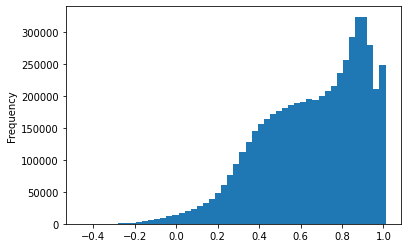

In [ ]:
train.P_2.plot(kind='hist', bins =50)

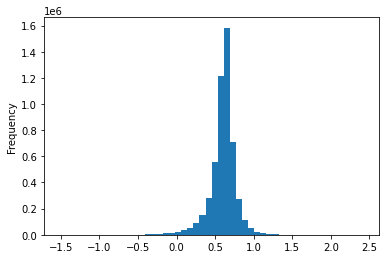

In [ ]:
train.P_3.plot(kind='hist', bins =50)

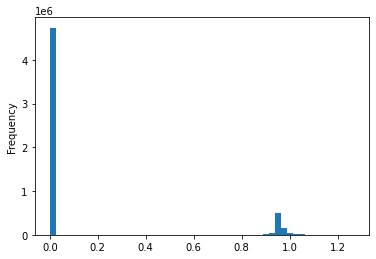

In [ ]:
train.P_4.plot(kind='hist', bins =50)

1

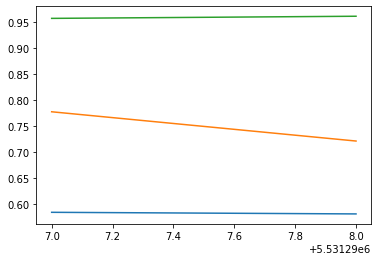

In [ ]:
cus = 458899
train.loc[train.customer_ID	 == cus].P_2.plot()
train.loc[train.customer_ID	 == cus].P_3.plot()
train.loc[train.customer_ID	 == cus].P_4.plot()
features_fin.target[cus]

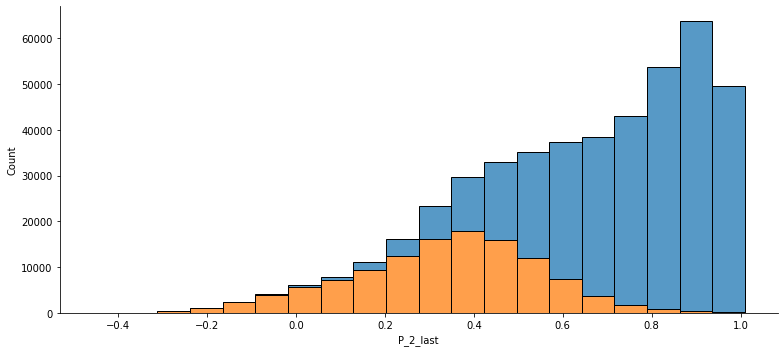

In [ ]:
sns.displot(features_fin, x='P_2_last', bins=20, height=5, legend=False, hue="target", multiple="stack", aspect=2.2)

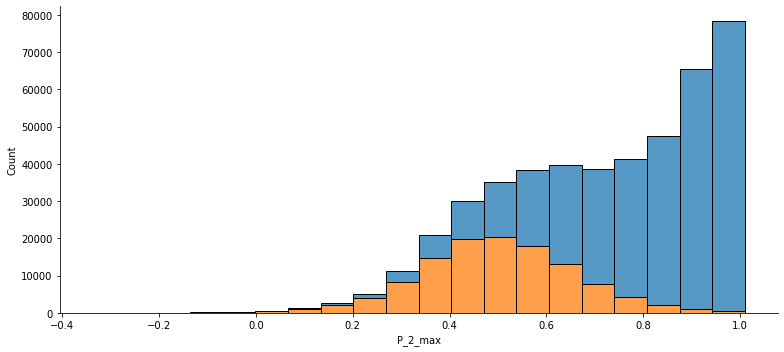

In [ ]:
sns.displot(features_fin, x='P_2_max', bins=20, height=5, legend=False, hue="target", multiple="stack", aspect=2.2)

In [ ]:
features_fin.loc[features_fin.target == 1]

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,B_31_mean,B_31_std,B_31_min,B_31_max,B_31_last,...,D_126_nunique,D_63_last,D_63_nunique,D_64_last,D_64_nunique,D_66_last,D_66_nunique,D_68_last,D_68_nunique,target
8,0.406705,0.009116,0.391495,0.424624,0.424624,1.000000,0.00000,1,1,1,...,1,3,1,3,1,1.0,1,6.0,2,1
9,0.447386,0.058701,0.359892,0.556354,0.359892,1.000000,0.00000,1,1,1,...,1,3,1,0,1,NaN,0,5.0,1,1
10,0.374289,0.206339,0.254523,0.612548,0.255796,1.000000,0.00000,1,1,1,...,2,3,1,2,2,NaN,0,3.0,1,1
11,0.246515,0.113145,-0.015913,0.366329,-0.015913,1.000000,0.00000,1,1,1,...,1,3,1,0,1,NaN,0,4.0,2,1
12,0.386107,0.031185,0.340604,0.431697,0.424076,1.000000,0.00000,1,1,1,...,1,3,1,3,1,NaN,0,3.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458896,0.513501,0.097925,0.405106,0.643031,0.408619,1.000000,0.00000,1,1,1,...,1,3,1,2,2,NaN,0,3.0,1,1
458897,0.253711,0.102431,0.109040,0.383151,0.151150,0.923077,0.27735,0,1,1,...,1,3,1,0,1,NaN,0,6.0,1,1
458898,0.206972,0.111052,0.076637,0.436645,0.222896,1.000000,0.00000,1,1,1,...,3,3,1,3,1,NaN,0,3.0,1,1
458899,0.583032,0.002188,0.581485,0.584579,0.581485,1.000000,0.00000,1,1,1,...,1,2,1,3,1,1.0,1,5.0,1,1


substract P_3 from P_2. <br> 
compute usual metrics. <br>
corr and cov. <br>

In [ ]:
corr = train[['customer_ID', 'P_2', 'P_3', 'P_4']].groupby('customer_ID').agg('corr')

In [ ]:
corr

P_2       P_3  P_4
customer_ID                             
0           P_2  1.000000  0.442552  NaN
            P_3  0.442552  1.000000  NaN
            P_4       NaN       NaN  NaN
1           P_2  1.000000  0.891242  NaN
            P_3  0.891242  1.000000  NaN
...                   ...       ...  ...
458911      P_3  0.505275  1.000000  NaN
            P_4       NaN       NaN  NaN
458912      P_2  1.000000  0.822293  NaN
            P_3  0.822293  1.000000  NaN
            P_4       NaN       NaN  NaN

[1376739 rows x 3 columns]

In [ ]:
new = pd.DataFrame(columns=['P_3_P_2', 'P_3_P_4', 'P_4_P_2'])


In [ ]:
new.reset_index(drop=True, inplace=True)

In [ ]:
index = [feat[1] == 'P_3' for feat in corr.index.values]
index2 = [feat[1] == 'P_4' for feat in corr.index.values]

In [ ]:
new['P_3_P_2'] = corr.loc[index, 'P_2'].values

In [ ]:
new['P_3_P_4'] = corr.loc[index, 'P_4'].values

In [ ]:
new['P_4_P_2'] = corr.loc[index2, 'P_2'].values

In [ ]:
new.colums = [feature + '_corr' for feature in new.columns]

In [ ]:
new2 = pd.DataFrame()

In [ ]:
new2['P_2_m_P_3'] = train['P_2'] - train['P_3']
new2['P_2_m_P_4'] = train['P_2'] - train['P_4']
new2['P_3_m_P_4'] = train['P_3'] - train['P_4']

new2['P_2_p_P_3'] = train['P_2'] - train['P_3']
new2['P_2_p_P_4'] = train['P_2'] - train['P_4']
new2['P_3_p_P_4'] = train['P_3'] - train['P_4']

new2['P_2_t_P_3'] = train['P_2'] * train['P_3']
new2['P_2_t_P_4'] = train['P_2'] * train['P_4']
new2['P_3_t_P_4'] = train['P_3'] * train['P_4']

new2['P_2_d_P_3'] = train['P_2'] / train['P_3']
new2['P_2_d_P_4'] = train['P_2'] / train['P_4']
new2['P_3_d_P_4'] = train['P_3'] / train['P_4']

new2['P_2_sq_P_3'] = train['P_2'].pow(2)
new2['P_2_sq_P_4'] = train['P_2'].pow(2)
new2['P_3_sq_P_4'] = train['P_3'].pow(2)

In [ ]:
new2['customer_ID'] = train['customer_ID']

In [ ]:
new2 = new2.groupby("customer_ID").agg(['mean', 'std', 'min', 'max', 'first', 'last'])

In [ ]:
new2.columns = ['_'.join(x) for x in new2.columns]

In [ ]:
new = pd.concat([new, new2], axis=1)

In [ ]:
new.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/P_2_corr_m_p_sq_agg.parquet')

### S_

In [ ]:
[feature for feature in train.columns if 'S_' in feature]

['S_2',
 'S_3',
 'S_5',
 'S_6',
 'S_7',
 'S_8',
 'S_9',
 'S_11',
 'S_12',
 'S_13',
 'S_15',
 'S_16',
 'S_17',
 'S_18',
 'S_19',
 'S_20',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'S_27']

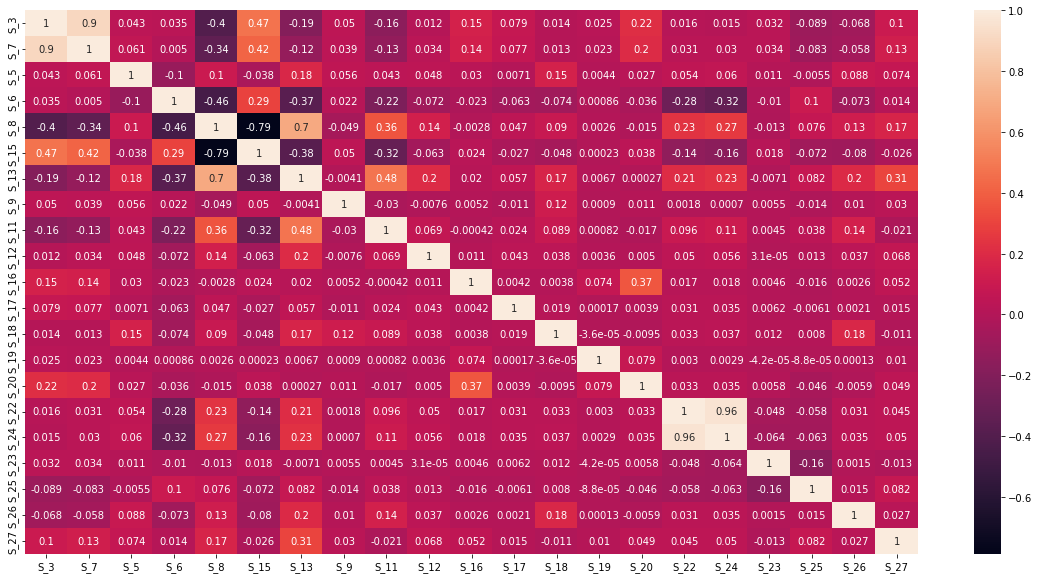

In [ ]:
s_features = train[[feature for feature in train.columns if 'S_' in feature]]
corr_train = s_features.corr()
clusters   = perform_clustering(corr_train, limit = 0.5)
clusters  = [inner for outer in clusters for inner in outer]
#members    = elect_members(corr_train, clusters)

plt.figure(figsize=(20,10))
corr_num = train[clusters].corr()
sns.heatmap(corr_num, annot=True)

In [ ]:
cus = 7911

#### categorial S_20, S_6, S_18

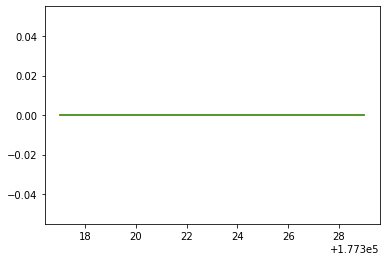

In [ ]:
train.loc[train.customer_ID == cus].S_20.plot()
train.loc[train.customer_ID == cus].S_6.plot()
train.loc[train.customer_ID == cus].S_18.plot()

In [ ]:
train.S_20.value_counts(), train.S_6.value_counts(), train.S_18.value_counts()

(0    5462374
 1      69077
 Name: S_20, dtype: int64, 0    4208371
 1    1323080
 Name: S_6, dtype: int64, 0    5385055
 1     146396
 Name: S_18, dtype: int64)

In [ ]:
test = train[['customer_ID', 'S_20', 'S_18', 'S_6']].groupby("customer_ID").agg(['sum'])
test.columns = ['_'.join(x) for x in test.columns]

In [ ]:
coll = train[['customer_ID', 'S_20']].groupby("customer_ID").agg(['count'])
coll.columns = ['_'.join(x) for x in coll.columns]

In [ ]:
test.columns = [x + '_avg' for x in test.columns]

In [ ]:
test = test.divide(coll.S_20_count, axis=0)

#### First region 

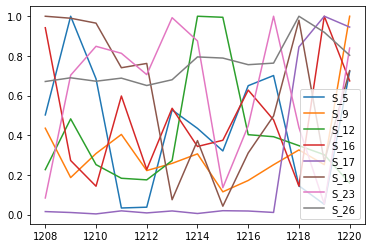

In [ ]:
cus=100
(train.loc[train.customer_ID == cus].S_5/train.loc[train.customer_ID == cus].S_5.max()).plot()
(train.loc[train.customer_ID == cus].S_9/train.loc[train.customer_ID == cus].S_9.max()).plot()
(train.loc[train.customer_ID == cus].S_12/train.loc[train.customer_ID == cus].S_12.max()).plot()
(train.loc[train.customer_ID == cus].S_16/train.loc[train.customer_ID == cus].S_16.max()).plot()
(train.loc[train.customer_ID == cus].S_17/train.loc[train.customer_ID == cus].S_17.max()).plot()
(train.loc[train.customer_ID == cus].S_19/train.loc[train.customer_ID == cus].S_19.max()).plot()
(train.loc[train.customer_ID == cus].S_26/train.loc[train.customer_ID == cus].S_26.max()).plot()
(train.loc[train.customer_ID == cus].S_27/train.loc[train.customer_ID == cus].S_27.max()).plot()
plt.legend(['S_5', 'S_9', 'S_12', 'S_16', 'S_17', 'S_19', 'S_23', 'S_26', 'S_27'])

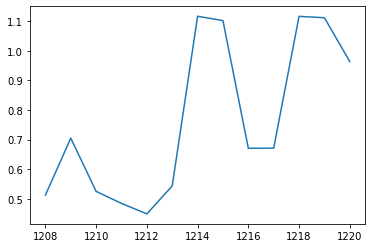

In [ ]:
cus=100
(train.loc[train.customer_ID == cus].S_5 +\
train.loc[train.customer_ID == cus].S_9 +\
train.loc[train.customer_ID == cus].S_12 +\
train.loc[train.customer_ID == cus].S_16 +\
train.loc[train.customer_ID == cus].S_17+\
train.loc[train.customer_ID == cus].S_19+\
train.loc[train.customer_ID == cus].S_26+\
train.loc[train.customer_ID == cus].S_27).plot()

In [ ]:
curr = train[['customer_ID', 'S_5', 'S_9', 'S_12', 'S_16', 'S_17', 'S_19', 'S_23', 'S_25', 'S_26', 'S_27']].groupby('customer_ID').agg('corr')

In [ ]:
curr = curr.unstack()
curr = curr[[feature for feature in curr.columns if feature[0] != feature[1]]]

features = [curr.columns[0]]

for feature in curr.columns[1:]:

  if any(feature[0] == already[1] and feature[1] == already[0] for already in features): continue

  features.append(feature)



In [ ]:
curr = curr[features]

In [ ]:
curr.columns = ['_'.join(x) + '_corr' for x in curr.columns]

In [ ]:
test = pd.concat([test,curr], axis = 1)

In [ ]:
test

,S_20_sum_avg,S_18_sum_avg,S_6_sum_avg,S_5_S_9_corr,S_5_S_12_corr,S_5_S_16_corr,S_5_S_17_corr,S_5_S_19_corr,S_5_S_23_corr,S_5_S_25_corr,...,S_19_S_23_corr,S_19_S_25_corr,S_19_S_26_corr,S_19_S_27_corr,S_23_S_25_corr,S_23_S_26_corr,S_23_S_27_corr,S_25_S_26_corr,S_25_S_27_corr,S_26_S_27_corr
customer_ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.000000,0.202691,0.315898,0.224984,-0.272777,-0.156896,0.059538,0.589745,...,-0.116331,-0.188577,0.411913,0.035157,0.377758,-0.196158,0.013084,-0.197061,0.082552,-0.149992
1,0.0,0.000000,0.000000,0.471049,0.436182,0.013476,0.586213,-0.039425,-0.293746,0.075071,...,0.212616,-0.203402,-0.144637,-0.120233,-0.356475,-0.210214,0.043242,0.131061,0.285457,0.159522
2,0.0,0.000000,1.000000,NaN,0.540373,0.133295,0.260002,-0.485266,0.299550,-0.086712,...,-0.175832,0.120585,-0.236121,NaN,-0.231502,0.298479,NaN,-0.246915,NaN,NaN
3,0.0,0.000000,0.000000,0.461518,0.383705,-0.041728,-0.138032,0.260565,0.355300,0.099953,...,0.688024,-0.403444,-0.286098,-0.164025,-0.183984,-0.278564,-0.367327,0.410577,-0.189989,-0.008002
4,0.0,0.000000,0.846154,NaN,0.075498,0.101145,0.496854,0.060508,-0.631063,0.022601,...,-0.397203,-0.044356,-0.479179,NaN,0.323635,-0.208772,NaN,0.319414,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.0,0.000000,0.000000,0.190065,-0.021465,-0.251300,0.570523,0.230459,0.298584,0.281960,...,0.434150,0.369612,0.186524,-0.124380,0.050856,-0.154469,0.033760,0.145671,-0.391687,-0.256813
458909,0.0,0.153846,0.461538,NaN,-0.284321,0.208254,0.341492,-0.089233,0.198955,-0.150272,...,-0.100876,-0.005507,0.333521,0.985222,0.099496,-0.195268,0.975050,0.077949,-0.490209,-0.337272
458910,0.0,0.000000,0.000000,0.536269,0.308400,0.189256,-0.114401,0.081466,-0.177985,0.201471,...,0.141278,0.364116,-0.048245,0.230025,0.057069,-0.329818,0.704601,0.003355,0.176176,-0.162113


#### Independedt - no extra feature made

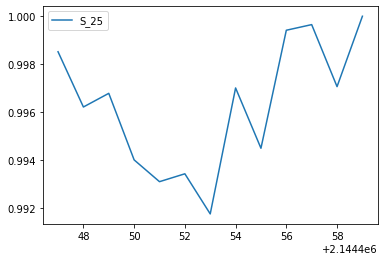

In [ ]:
cus=177780
(train.loc[train.customer_ID == cus].S_25/train.loc[train.customer_ID == cus].S_25.max()).plot()
plt.legend(['S_25'])

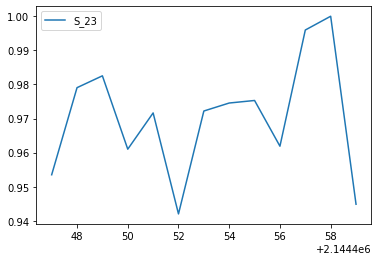

In [ ]:
cus=177780
(train.loc[train.customer_ID == cus].S_23/train.loc[train.customer_ID == cus].S_23.max()).plot()
plt.legend(['S_23'])

#### Second Region

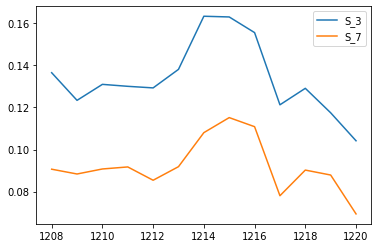

In [ ]:
train.loc[train.customer_ID == cus].S_3.plot()
train.loc[train.customer_ID == cus].S_7.plot()
plt.legend(['S_3', 'S_7'])

In [ ]:
curr = train[['customer_ID', 'S_3', 'S_7']].groupby('customer_ID').agg('corr')

In [ ]:
curr = curr.unstack()
curr = curr[[feature for feature in curr.columns if feature[0] != feature[1]]]

In [ ]:
curr = curr[[('S_3', 'S_7')]]
curr.columns = ['S_3_S_7_corr']
test['S_3_S_7_corr'] = curr['S_3_S_7_corr']

In [ ]:
train['S_3_p_S_7'] = train['S_3'] + train['S_7']

train['S_3_m_S_7'] = train['S_3'] - train['S_7']

train['S_3_t_S_7'] = train['S_3'] * train['S_7']

train['S_3_d_S_7'] = train['S_3'] / train['S_7']

train['S_3_sq'] = train['S_3'].pow(2)

train['S_7_sq'] = train['S_7'].pow(2)

In [ ]:
aggregations = train[['customer_ID', 'S_3_p_S_7', 'S_3_m_S_7', 'S_3_t_S_7', 'S_3_d_S_7', 'S_3_sq', 'S_7_sq']].groupby('customer_ID').agg( ['mean', 'std', 'max', 'min', 'last', 'first'])

In [ ]:
aggregations.columns = ['_'.join(x) for x in aggregations.columns]
test = pd.concat([test, aggregations], axis = 1)

In [ ]:
test = pd.concat([test, aggregations], axis = 1)

#### Third Region

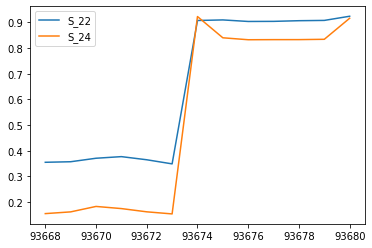

In [ ]:
cus = 7773
train.loc[train.customer_ID == cus].S_22.plot()
train.loc[train.customer_ID == cus].S_24.plot()
plt.legend(['S_22', 'S_24'])

In [ ]:
curr = train[['customer_ID', 'S_22', 'S_24']].groupby('customer_ID').agg('corr')

In [ ]:
curr = curr.unstack()

In [ ]:
curr = curr[[('S_22', 'S_24')]]

In [ ]:
curr.columns = ['S_22_S_24_corr']
test['S_22_S_24_corr'] = curr['S_22_S_24_corr']

In [ ]:
train['S_22_p_S_24'] = train['S_22'] + train['S_24']

train['S_22_m_S_24'] = train['S_22'] - train['S_24']

train['S_22_t_S_24'] = train['S_22'] * train['S_24']

train['S_22_d_S_24'] = train['S_22'] / train['S_24']

train['S_22_sq'] = train['S_22'].pow(2)

train['S_24_sq'] = train['S_24'].pow(2)

In [ ]:
aggregations = train[['customer_ID', 'S_22_p_S_24', 'S_22_m_S_24', 'S_22_t_S_24', 'S_22_d_S_24', 'S_22_sq', 'S_24_sq']].groupby('customer_ID').agg( ['mean', 'std', 'max', 'min', 'last', 'first'])
aggregations.columns = ['_'.join(x) for x in aggregations.columns]
test = pd.concat([test, aggregations], axis = 1)

#### Same dynamics

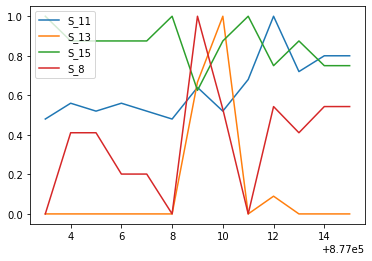

In [ ]:
cus = 72739
(train.loc[train.customer_ID == cus].S_11/train.loc[train.customer_ID == cus].S_11.max()).plot()
(train.loc[train.customer_ID == cus].S_13/train.loc[train.customer_ID == cus].S_13.max()).plot()
(train.loc[train.customer_ID == cus].S_15/train.loc[train.customer_ID == cus].S_15.max()).plot()
(train.loc[train.customer_ID == cus].S_8/train.loc[train.customer_ID == cus].S_8.max()).plot()
plt.legend(['S_11', 'S_13', 'S_15', 'S_8'])

In [ ]:
curr = train[['customer_ID', 'S_11', 'S_13', 'S_15', 'S_8']].groupby('customer_ID').agg('corr')

In [ ]:
curr = curr.unstack()
curr = curr[[feature for feature in curr.columns if feature[0] != feature[1]]]

In [ ]:

features = [curr.columns[0]]

for feature in curr.columns[1:]:

  if feature[::-1] in features: continue

  features.append(feature)

In [ ]:
curr = curr[features]

In [ ]:
curr.columns = ['_'.join(x) for x in curr.columns]

In [ ]:
test = pd.concat([test,curr], axis=1)

In [ ]:

train['S_11_p_S_13'] = train['S_11'] + train['S_13']

train['S_11_m_S_13'] = train['S_11'] - train['S_13']

train['S_11_t_S_13'] = train['S_11'] * train['S_13']

train['S_11_d_S_13'] = train['S_11'] / train['S_13']


train['S_15_p_S_8'] = train['S_15'] + train['S_8']

train['S_15_m_S_8'] = train['S_15'] - train['S_8']

train['S_15_t_S_8'] = train['S_15'] * train['S_8']

train['S_15_d_S_8'] = train['S_15'] / train['S_8']


train['S_11_sq'] = train['S_11'].pow(2)

train['S_13_sq'] = train['S_13'].pow(2)

train['S_15_sq'] = train['S_15'].pow(2)

train['S_8_sq'] = train['S_8'].pow(2)

In [ ]:
aggregations = train[['customer_ID', 'S_11_p_S_13', 'S_11_m_S_13', 'S_11_t_S_13', 'S_11_d_S_13', 'S_15_p_S_8', 'S_15_m_S_8', 'S_15_t_S_8', 'S_15_d_S_8', 'S_11_sq', 'S_13_sq', 'S_15_sq', 'S_8_sq']].groupby('customer_ID').agg( ['mean', 'std', 'max', 'min', 'last', 'first'])
aggregations.columns = ['_'.join(x) for x in aggregations.columns]
test = pd.concat([test, aggregations], axis = 1)

In [ ]:
test.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/spend_variables.parquet')

### R_

In [ ]:
[feature for feature in train.columns if 'R_' in feature]

['R_1',
 'R_2',
 'R_3',
 'R_4',
 'R_5',
 'R_6',
 'R_7',
 'R_8',
 'R_9',
 'R_10',
 'R_11',
 'R_12',
 'R_13',
 'R_14',
 'R_15',
 'R_16',
 'R_17',
 'R_18',
 'R_19',
 'R_20',
 'R_21',
 'R_22',
 'R_23',
 'R_24',
 'R_25',
 'R_26',
 'R_27',
 'R_28']

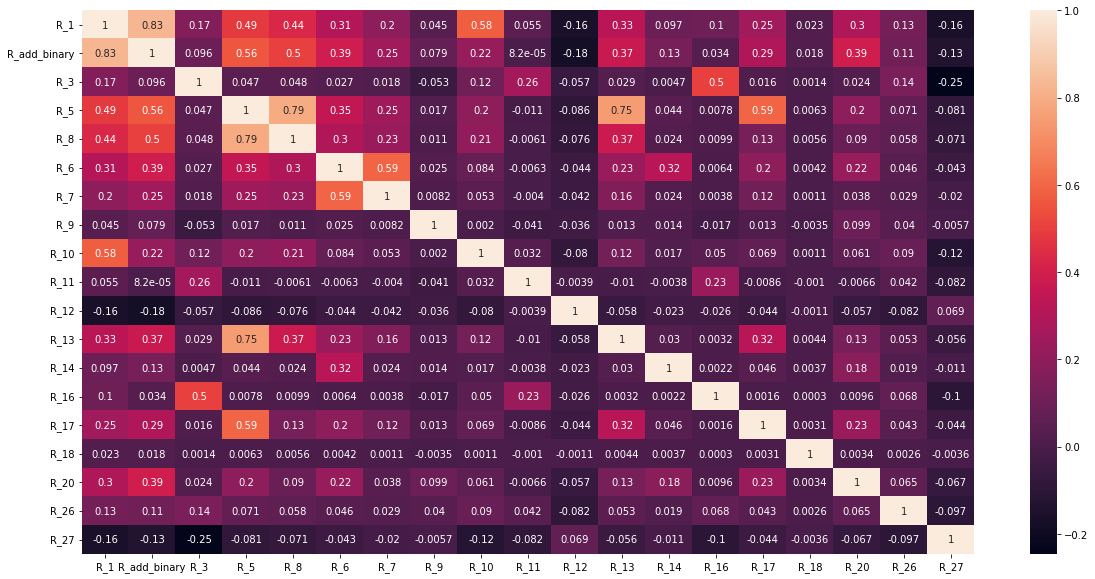

In [ ]:
features = [feature for feature in train.columns if 'R_' in feature and feature not in r_bin]
s_features = train[features]
corr_train = s_features.corr()
clusters   = perform_clustering(corr_train, limit = 0.6)
clusters  = [inner for outer in clusters for inner in outer]
#members    = elect_members(corr_train, clusters)

plt.figure(figsize=(20,10))
corr_num = train[clusters].corr()
sns.heatmap(corr_num, annot=True)

#### First Group

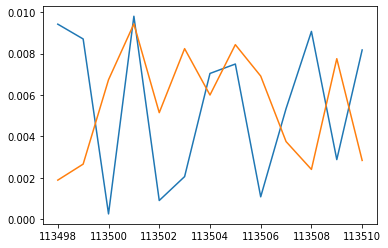

In [ ]:
cus = 9407
train.loc[train.customer_ID == cus].R_1.plot()
train.loc[train.customer_ID == cus].R_6.plot()

In [ ]:
train['R_1_p_R_6'] = train['R_1'] + train['R_6']

train['R_1_m_R_6'] = train['R_1'] - train['R_6']

train['R_1_t_R_6'] = train['R_1'] * train['R_6']

train['R_1_d_R_6'] = train['R_1'] / train['R_6']

train['R_1_sq'] = train['R_1'].pow(2)

train['R_6_sq'] = train['R_6'].pow(2)

aggregations = train[['customer_ID', 'R_1_p_R_6', 'R_1_m_R_6', 'R_1_t_R_6', 'R_1_d_R_6', 'R_1_sq', 'R_6_sq']].groupby('customer_ID').agg( ['mean', 'std', 'max', 'min', 'last', 'first'])
aggregations.columns = ['_'.join(x) for x in aggregations.columns]

#### Varibales of increasinf risk

In [ ]:
three_bin = []

for feature in [feature for feature in train.columns if 'R_' in feature]:

  print(feature, len(train[feature].unique()), train[feature].isna().sum())

R_1 4788285 0
R_2 2 0
R_3 91 0
R_4 2 0
R_5 47 0
R_6 4959486 0
R_7 144972 1
R_8 33 0
R_9 10 0
R_10 18 0
R_11 19 0
R_12 151167 56
R_13 28 0
R_14 77587 1
R_15 2 0
R_16 32 0
R_17 25 0
R_18 20 0
R_19 2 0
R_20 43 75
R_21 2 0
R_22 2 0
R_23 2 0
R_24 2 0
R_25 2 0
R_26 157 0
R_27 685819 128703
R_28 2 0
R_1_p_R_6 4760585 0
R_1_m_R_6 5178803 0
R_1_t_R_6 5285788 0
R_1_d_R_6 5274207 0
R_1_sq 4788285 0
R_6_sq 4959486 0
sum_R_5_7_8_13_14_17_18_20 199967 75
sum_R_9_10_12_26 154117 56
sum_R_3_11_16 2358 0


In [ ]:
a=targets.loc[train.loc[train.R_5 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_7 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_8 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_9.notna()].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_10 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_12 != 1].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_13 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_14 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_17 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_18 != 0].customer_ID.unique()]
print(a.mean().values, len(a))
a=targets.loc[train.loc[train.R_20 != 0].customer_ID.unique()]
print(a.mean().values, len(a))

[0.74432302] 53990
[0.74927533] 52783
[0.75448114] 50322
[0.58625051] 39536
[0.66371027] 97416
[0.6000359] 22287
[0.85230507] 24598
[0.7461464] 26858
[0.85678251] 17840
[0.62566845] 187
[0.74231722] 27464


In [ ]:
my_set = \
list(train.loc[train.R_5 != 0].customer_ID.unique()) + \
list(train.loc[train.R_7 != 0].customer_ID.unique()) + \
list(train.loc[train.R_8 != 0].customer_ID.unique()) + \
list(train.loc[train.R_13 != 0].customer_ID.unique()) + \
list(train.loc[train.R_14 != 0].customer_ID.unique()) + \
list(train.loc[train.R_17 != 0].customer_ID.unique()) + \
list(train.loc[train.R_18 != 0].customer_ID.unique()) + \
list(train.loc[train.R_20 != 0].customer_ID.unique())

my_set = list(set(my_set))

In [ ]:
targets.loc[my_set].mean().values, len(my_set)

(array([0.71267011]), 63930)

In [ ]:
train['sum_R_5_7_8_13_14_17_18_20'] = \
train.R_5 / train.R_5.max() + \
train.R_7 / train.R_7.max() + \
train.R_8 / train.R_8.max() + \
train.R_13 / train.R_13.max() + \
train.R_14 / train.R_14.max() + \
train.R_17 / train.R_17.max() + \
train.R_18 / train.R_18.max() + \
train.R_20 / train.R_20.max()

In [ ]:
train.sum_R_5_7_8_13_14_17_18_20.value_counts()

0.000000    5316799
0.040602       6975
0.022222       3984
0.046544       1400
0.042857        619
             ...   
0.045628          1
0.022583          1
0.094787          1
0.132058          1
0.040968          1
Name: sum_R_5_7_8_13_14_17_18_20, Length: 199966, dtype: int64

In [ ]:
my_set = \
list(train.loc[train.R_9.notna()].customer_ID.unique()) + \
list(train.loc[train.R_10 != 0].customer_ID.unique()) + \
list(train.loc[train.R_12 != 1].customer_ID.unique())
my_set = list(set(my_set))

In [ ]:
targets.loc[my_set].mean().values, len(my_set)

(array([0.59911262]), 128919)

In [ ]:
train.loc[train.R_9.isna(), 'R_9'] = 0
train.loc[train.R_26.isna(), 'R_26'] = 0
train.R_12 = ((train.R_12 * -1) + 1)

train['sum_R_9_10_12_26'] = \
train.R_9 / train.R_9.max() + \
train.R_10 / train.R_10.max() + \
train.R_12 / train.R_12.max() + \
train.R_26 / train.R_26.max()

In [ ]:
train.sum_R_9_10_12.value_counts()

0.000000    4898730
0.111111     182930
0.047619     169903
0.222222      34774
0.095238      28682
             ...   
0.920525          1
0.833346          1
0.819296          1
0.983074          1
0.826996          1
Name: sum_R_9_10_12, Length: 152372, dtype: int64

In [ ]:
curr = train[['customer_ID', 'sum_R_9_10_12_26', 'sum_R_5_7_8_13_14_17_18_20']].groupby('customer_ID').agg(['mean', 'std', 'max', 'min', 'last', 'first'])


In [ ]:
curr.columns = ['_'.join(x) for x in curr.columns]

In [ ]:
aggregations = pd.concat([aggregations, curr], axis=1)

In [ ]:
print(targets.loc[train.loc[~train.R_3.isin([0,1,2])].customer_ID.unique()].mean().values) ###
print(targets.loc[train.loc[~train.R_11.isin([0,1,2])].customer_ID.unique()].mean().values) ###
print(targets.loc[train.loc[~train.R_16.isin([0,1,2])].customer_ID.unique()].mean().values) ###

[0.31073065]
[0.58979819]
[0.59928287]


In [ ]:
train['sum_R_3_11_16'] = \
train.R_3 / train.R_3.max() + \
train.R_11 / train.R_11.max() + \
train.R_16 / train.R_16.max()

In [ ]:
curr = train[['customer_ID', 'sum_R_3_11_16']].groupby('customer_ID').agg(['mean', 'std', 'max', 'min', 'last', 'first'])

In [ ]:
curr.columns = ['_'.join(x) for x in curr.columns]

In [ ]:
aggregations = pd.concat([aggregations, curr], axis=1)

In [ ]:
aggregations.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/risk_variables.parquet')

#### Binary

In [ ]:
r_bin = []
s_features = [feature for feature in train.columns if 'R_' in feature]

for feature in s_features:

  if len(train[feature].unique()) == 2:
    
    r_bin.append(feature)

In [ ]:
r_bin

['R_2', 'R_4', 'R_15', 'R_19', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_28']

In [ ]:
len(train.R_27.unique())

3

In [ ]:
for rb in r_bin:
  
  print(targets.loc[train.loc[train[rb] == 1].customer_ID.unique()].mean(), len(train.loc[train[rb] == 1].customer_ID.unique()))

target    0.716142
dtype: float64 68971
target    0.758499
dtype: float64 51743
target    0.667959
dtype: float64 49533
target    0.566005
dtype: float64 13196
target    0.714193
dtype: float64 19975
target    0.724546
dtype: float64 9134
target    0.642353
dtype: float64 425
target    0.756249
dtype: float64 26244
target    0.68714
dtype: float64 10762
target    0.66269
dtype: float64 922


In [ ]:
targets.loc[train.loc[train.R_27 == 1].customer_ID.unique()].mean(), len(train.loc[train.R_27 == 1].customer_ID.unique())

(target    0.498791
 dtype: float64, 80226)

In [ ]:
train['R_add_binary'] = train.R_2 + train.R_4 + train.R_15 + train.R_19 + train.R_21 + train.R_22 + train.R_23 + train.R_24 + train.R_25 + train.R_27 + train.R_28

In [ ]:
train.R_add_binary.value_counts()

0.0    4443731
1.0     817108
2.0     153813
3.0      84166
4.0      28171
5.0       4146
6.0        312
7.0          4
Name: R_add_binary, dtype: int64

In [ ]:
aggre = train[['customer_ID', 'R_add_binary']].groupby('customer_ID').agg(['mean', 'std', 'last', 'first', 'max', 'min'])

In [ ]:
aggregations = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/risk_variables.parquet')

In [ ]:
aggregations.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/risk_variables.parquet')

In [ ]:
('/content/drive/MyDrive/KaggleAMEX/Data/risk_variables.parquet')
('/content/drive/MyDrive/KaggleAMEX/Data/spend_variables.parquet')

### B_

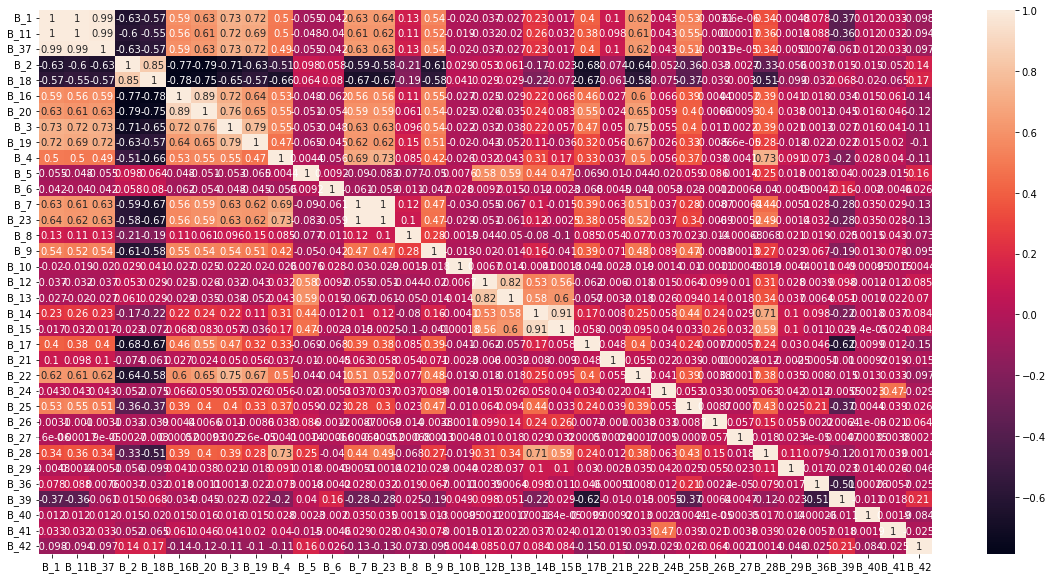

In [ ]:
'''
b_features = train[[feature for feature in train.columns if 'B_' in feature and feature not in cat_features]]
corr_train = b_features.corr()

clusters   = perform_clustering(corr_train, limit = 0.75)
members    = elect_members(corr_train, clusters)

clusters   = [inner for outer in clusters for inner in outer]
'''
plt.figure(figsize=(20,10))
corr_num = train[clusters].corr()
sns.heatmap(corr_num, annot=True)

In [ ]:
aggs = pd.DataFrame()

for i in range(len(clusters)):

  for j in clusters[i+1:]:

    if 0.7 < np.abs(corr_num.loc[clusters[i], j]) < 1:

      col1 = clusters[i]
      col2 = j
   
      test    = train[['customer_ID', col1, col2]].groupby('customer_ID').agg('corr')
      in_test = [(x, col1) for x in range(458913)]
      aggs[f'{col1}_{col2}_corr']  = test.loc[in_test, col2].values
     


In [ ]:
for i in range(len(clusters)):

  for j in clusters[i:]:

    if 0.7 < np.abs(corr_num.loc[corr_num.columns[i], j]) < 0.8:

      col1 = clusters[i]
      col2 = j

      print(col1, col2)

      train[f'{col1}_m_{col2}'] = train[col1] - train[col2]
      train[f'{col1}_p_{col2}'] = train[col1] + train[col2]
      train[f'{col1}_t_{col2}'] = train[col1] * train[col2]
      train[f'{col1}_d_{col2}'] = train[col1] / train[col2]

      aggs_new = train[['customer_ID', f'{col1}_m_{col2}', f'{col1}_p_{col2}', f'{col1}_t_{col2}', f'{col1}_d_{col2}']].groupby('customer_ID').agg(['last', 'first', 'mean', 'std', 'min', 'max'])
      aggs = pd.concat([aggs, aggs_new], axis=1)
      

B_1 B_3
B_1 B_19
B_11 B_3
B_37 B_3
B_37 B_19
B_2 B_16
B_2 B_20
B_2 B_3
B_18 B_16
B_18 B_20
B_16 B_3
B_20 B_3
B_3 B_19
B_3 B_22
B_4 B_23
B_4 B_28
B_14 B_28


In [ ]:
aggs.columns = ['_'.join(x) if 'corr' not in x else x for x in aggs.columns]
aggs.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/balance_features.parquet')

#### First group

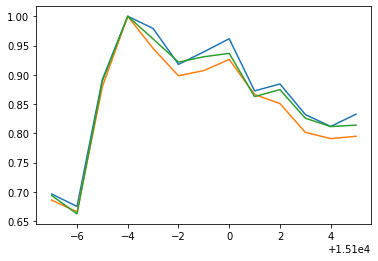

In [ ]:
cus=1258
(train.loc[train.customer_ID == cus].B_1/train.loc[train.customer_ID == cus].B_1.max()).plot()
(train.loc[train.customer_ID == cus].B_11/train.loc[train.customer_ID == cus].B_11.max()).plot()
(train.loc[train.customer_ID == cus].B_37/train.loc[train.customer_ID == cus].B_37.max()).plot()

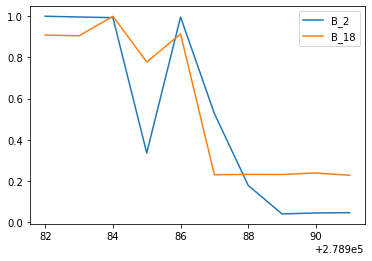

In [ ]:
cus=23123
(train.loc[train.customer_ID == cus].B_2/train.loc[train.customer_ID == cus].B_2.max()).plot()
(train.loc[train.customer_ID == cus].B_18/train.loc[train.customer_ID == cus].B_18.max()).plot()
plt.legend(['B_2', 'B_18'])

In [ ]:
train['B_3_m_B_19'] = train['B_3'] - train['B_19']
train['B_3_p_B_19'] = train['B_3'] + train['B_19']
train['B_3_t_B_19'] = train['B_3'] * train['B_19']
train['B_3_d_B_19'] = train['B_3'] / train['B_19']

In [ ]:
aggs = train[['customer_ID', 'B_3_m_B_19', 'B_3_p_B_19', 'B_3_t_B_19', 'B_3_d_B_19']].groupby('customer_ID').agg(['last', 'first', 'mean', 'std', 'min', 'max'])

In [ ]:
train['B_1_m_B_11'] = train['B_1'] - train['B_11']
train['B_1_p_B_11'] = train['B_1'] + train['B_11']

train['B_1_m_B_37'] = train['B_1'] * train['B_37']
train['B_1_p_B_37'] = train['B_1'] / train['B_37']

train['B_11_t_B_37'] = train['B_37'] * train['B_11']
train['B_11_d_B_37'] = train['B_37'] / train['B_11']

In [ ]:
aggs_new = train[['customer_ID', 'B_1_m_B_11', 'B_1_p_B_11', 'B_1_m_B_37', 'B_1_p_B_37', 'B_11_t_B_37', 'B_11_d_B_37']].groupby('customer_ID').agg(['last', 'first', 'mean', 'std', 'min', 'max'])
aggs = pd.concat([aggs, aggs_new], axis=1)

In [ ]:
aggs.columns = ['_'.join(x) for x in aggs.columns]

In [ ]:
aggs.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/balance_features.parquet')

#### Second group

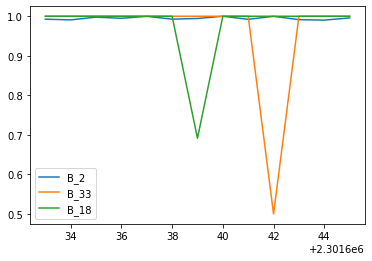

In [ ]:
cus=190798
(train.loc[train.customer_ID == cus].B_2/train.loc[train.customer_ID == cus].B_2.max()).plot()
(train.loc[train.customer_ID == cus].B_33/train.loc[train.customer_ID == cus].B_33.max()).plot()
(train.loc[train.customer_ID == cus].B_18/train.loc[train.customer_ID == cus].B_18.max()).plot()
plt.legend(['B_2', 'B_33', 'B_18'])

#### Third group

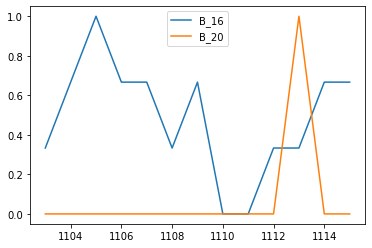

In [ ]:
cus=91
(train.loc[train.customer_ID == cus].B_16/train.loc[train.customer_ID == cus].B_16.max()).plot()
(train.loc[train.customer_ID == cus].B_20/train.loc[train.customer_ID == cus].B_20.max()).plot()
plt.legend(['B_16', 'B_20'])

#### fourth

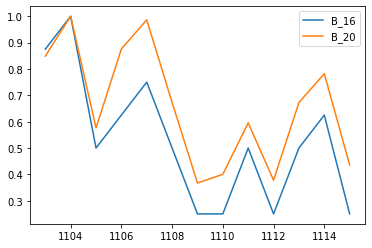

In [ ]:
cus=91
(train.loc[train.customer_ID == cus].B_4/train.loc[train.customer_ID == cus].B_4.max()).plot()
(train.loc[train.customer_ID == cus].B_28/train.loc[train.customer_ID == cus].B_28.max()).plot()
plt.legend(['B_16', 'B_20'])

#### fifth

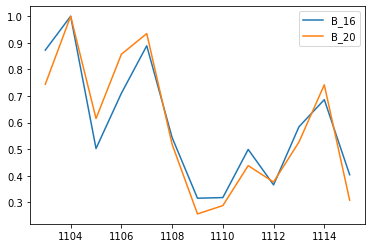

In [ ]:
cus=91
(train.loc[train.customer_ID == cus].B_7/train.loc[train.customer_ID == cus].B_7.max()).plot()
(train.loc[train.customer_ID == cus].B_23/train.loc[train.customer_ID == cus].B_23.max()).plot()
plt.legend(['B_7', 'B_23'])

#### sixth

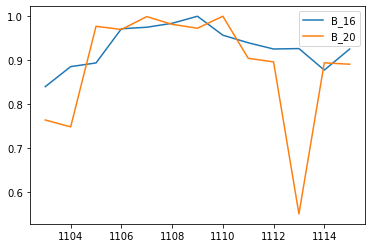

In [ ]:
cus=91
(train.loc[train.customer_ID == cus].B_12/train.loc[train.customer_ID == cus].B_12.max()).plot()
(train.loc[train.customer_ID == cus].B_13/train.loc[train.customer_ID == cus].B_13.max()).plot()
plt.legend(['B_12', 'B_13'])

#### seventh

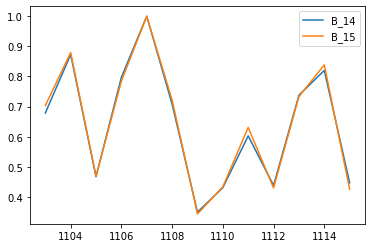

In [ ]:
cus=91
(train.loc[train.customer_ID == cus].B_14/train.loc[train.customer_ID == cus].B_14.max()).plot()
(train.loc[train.customer_ID == cus].B_15/train.loc[train.customer_ID == cus].B_15.max()).plot()
plt.legend(['B_14', 'B_15'])

#### eigth

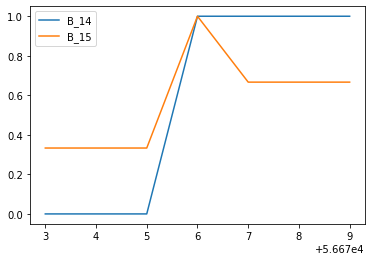

In [ ]:
cus=4712
(train.loc[train.customer_ID == cus].B_22/train.loc[train.customer_ID == cus].B_22.max()).plot()
(train.loc[train.customer_ID == cus].B_30/train.loc[train.customer_ID == cus].B_30.max()).plot()
plt.legend(['B_14', 'B_15'])

### D_

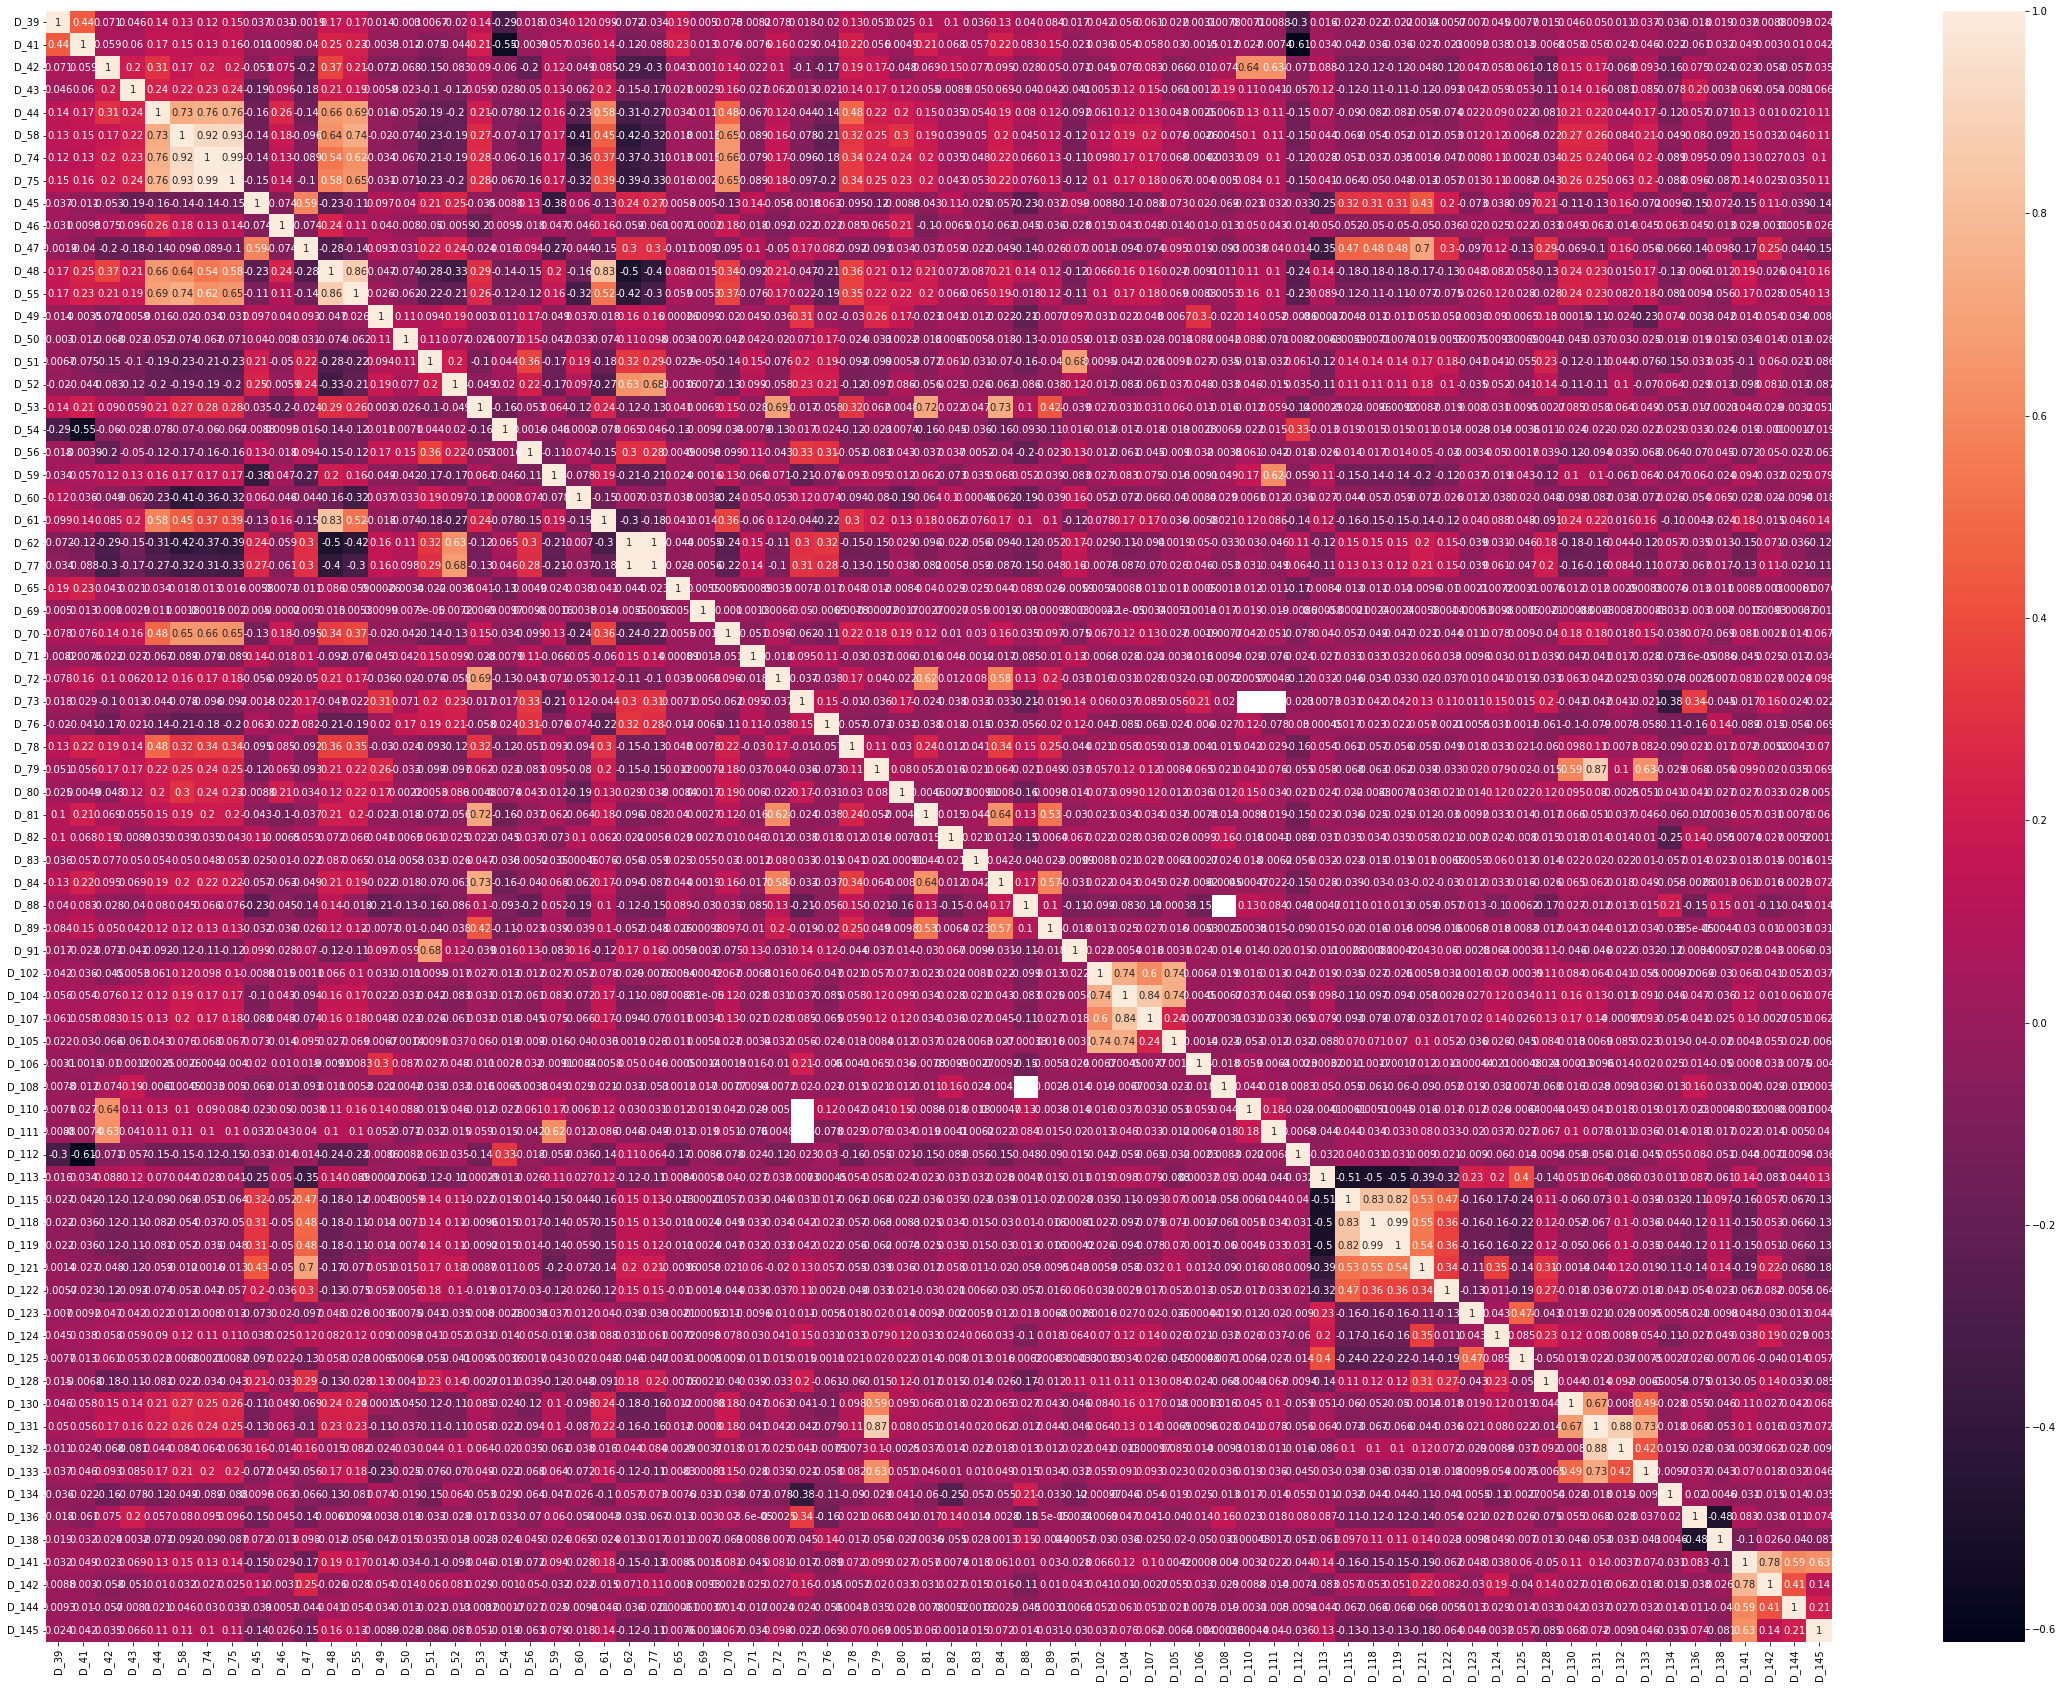

In [ ]:

b_features = [feature for feature in train.columns if 'D_' in feature and feature not in cat_features]
corr_train = train[b_features].corr()

clusters   = perform_clustering(corr_train, limit = 0.75)
members    = elect_members(corr_train, clusters)

clusters   = [inner for outer in clusters for inner in outer]

plt.figure(figsize=(40,30))
corr_num = train[clusters].corr()
sns.heatmap(corr_num, annot=True)

In [ ]:
aggs = pd.DataFrame()

for i in range(len(clusters)):

  for j in clusters[i+1:]:

    if 0.7 < np.abs(corr_num.loc[clusters[i], j]) < 1:

      col1 = clusters[i]
      col2 = j
      
      print(col1,col2)
      
      test    = train[['customer_ID', col1, col2]].groupby('customer_ID').agg('corr')
      in_test = [(x, col1) for x in range(458913)]
      aggs[f'{col1}_{col2}_corr']  = test.loc[in_test, col2].values
      

D_44 D_58
D_44 D_74
D_44 D_75
D_58 D_74
D_58 D_75
D_58 D_55
D_74 D_75
D_47 D_121
D_48 D_55
D_48 D_61
D_53 D_81
D_53 D_84
D_62 D_77
D_79 D_131
D_102 D_104
D_102 D_105
D_104 D_107
D_104 D_105
D_115 D_118
D_115 D_119
D_118 D_119
D_131 D_132
D_131 D_133
D_141 D_142


In [ ]:
for i in range(len(clusters)):

  for j in clusters[i:]:

    if 0.7 < np.abs(corr_num.loc[corr_num.columns[i], j]) < 0.8:

      col1 = clusters[i]
      col2 = j

      print(col1, col2)

      train[f'{col1}_m_{col2}'] = train[col1].fillna(0) - train[col2].fillna(0)
      train[f'{col1}_p_{col2}'] = train[col1].fillna(0) + train[col2].fillna(0)
      train[f'{col1}_t_{col2}'] = train[col1].fillna(0) * train[col2].fillna(0)
      train[f'{col1}_d_{col2}'] = train[col1].fillna(0) / train[col2].fillna(0)

      aggs_new = train[['customer_ID', f'{col1}_m_{col2}', f'{col1}_p_{col2}', f'{col1}_t_{col2}', f'{col1}_d_{col2}']].groupby('customer_ID').agg(['last', 'first', 'mean', 'std', 'min', 'max'])
      aggs = pd.concat([aggs, aggs_new], axis=1)
      

D_44 D_58
D_44 D_74
D_44 D_75
D_58 D_55
D_47 D_121
D_53 D_81
D_53 D_84
D_102 D_104
D_102 D_105
D_104 D_105
D_131 D_133
D_141 D_142


In [ ]:
aggs.columns = ['_'.join(x) if 'corr' not in x else x for x in aggs.columns]
aggs.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/delinquency_features.parquet')

# Frist/Second Difference of last

### first

In [ ]:
test = train[['S_2'] + num_features].diff(1)

In [ ]:
test.S_2 = test.S_2.apply(lambda x: x.days)

In [ ]:
test['customer_ID'] = train.customer_ID

In [ ]:
test = test.groupby('customer_ID').agg('last')

In [ ]:
test.columns = [x+'_diff_1' for x in test.columns]

In [ ]:
test.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/first_diff.parquet')

### Second

In [ ]:
train = train[['customer_ID', 'S_2'] + num_features]

new_index = [num - 0.5 for num in range(458913)]
to_merge = pd.DataFrame(new_index, columns=['customer_ID'])
train = pd.concat([train, to_merge], axis=0)
train.sort_values(['customer_ID', 'S_2'], inplace=True)
del to_merge

In [ ]:
train.reset_index(drop=True, inplace=True)
cus_id = [num if num%1 == 0 else -1 for num in train.customer_ID.values]

In [ ]:
train = train.diff(2, axis=0)

In [ ]:
train['customer_ID'] = cus_id

In [ ]:
new_index = [-1] + list( reversed(train.customer_ID.values))
new_index = new_index[:-1]

In [ ]:
last = 0
good_index = []

for num in new_index:

    if last == -1:

        good_index.append(num)
    
    else:

      good_index.append(-1)

    last =  num

In [ ]:
good_index = good_index[1:]
good_index = [-1] + list(reversed(good_index))
train['good_index']= good_index

In [ ]:
train = train.loc[train.good_index != -1][['S_2'] + num_features]

In [ ]:
train.S_2 = train.S_2.apply(lambda x: x.days)
train.reset_index(drop=True, inplace=True)
train.columns = [feature + '_diff_2' for feature in train.columns]

In [ ]:
train

,S_2_diff_2,P_2_diff_2,B_31_diff_2,D_39_diff_2,B_1_diff_2,B_2_diff_2,R_1_diff_2,S_3_diff_2,D_41_diff_2,B_3_diff_2,...,D_136_diff_2,D_137_diff_2,D_138_diff_2,D_139_diff_2,D_140_diff_2,D_141_diff_2,D_142_diff_2,D_143_diff_2,D_144_diff_2,D_145_diff_2
0,61.0,0.024933,0.0,0.0,0.006553,0.002849,-0.002072,0.036139,0.0,0.003937,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.000034,0.0
1,58.0,-0.000406,0.0,-1.0,0.024102,0.001715,0.000956,0.035393,0.0,0.002266,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.003457,0.0
2,59.0,-0.018573,0.0,0.0,0.000833,-0.001170,-0.000956,NaN,0.0,0.003356,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.008582,0.0
3,70.0,0.007115,0.0,0.0,-0.012545,0.037543,-0.001819,-0.015133,0.0,0.001533,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,0.000767,0.0
4,59.0,-0.009417,0.0,0.0,-0.002127,0.002384,-0.007829,NaN,0.0,0.005479,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,0.004393,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,74.0,0.006280,0.0,15.0,0.015351,0.002643,-0.003829,-0.005145,0.0,-0.001501,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.005411,0.0
458909,59.0,-0.025072,0.0,0.0,-0.026833,0.010927,-0.001902,NaN,0.0,-0.022972,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,0.003720,0.0
458910,55.0,0.005974,0.0,-4.0,-0.006538,0.005603,-0.004439,-0.009176,0.0,0.001423,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-0.004564,NaN
458911,57.0,-0.033310,0.0,-1.0,0.000330,0.504959,-0.007012,-0.200522,0.0,-0.033643,...,NaN,NaN,NaN,0.0,0.0,0.0087,0.012448,0.0,-0.004601,0.0


In [ ]:
train.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/second_diff.parquet')

# WOE

### Algorithm

In [ ]:

# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)
    
def data_vars(df1, target):

  stack = traceback.extract_stack()
  filename, lineno, function_name, code = stack[-2]
  vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
  final = (re.findall(r"[\w']+", vars_name))[-1]

  x = df1.dtypes.index
  count = -1

  for i in x:
      if i.upper() not in (final.upper()):
          if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
              conv = mono_bin(target, df1[i])
              conv["VAR_NAME"] = i
              count = count + 1
          else:
              conv = char_bin(target, df1[i])
              conv["VAR_NAME"] = i            
              count = count + 1
              
          if count == 0:
              iv_df = conv
          else:
              iv_df = iv_df.append(conv,ignore_index=True)

  iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
  iv = iv.reset_index()
  return(iv_df,iv)

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:

        print(ivars)

        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
            
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


### Calculation

In [ ]:
dir      = '/content/drive/MyDrive/KaggleAMEX/Data/base_variables.parquet'
features = [f'{x}_last' for x in cat_features]
cats_fet = pd.read_parquet(dir, columns=features)

In [ ]:
frequency = pd.read_csv('/content/drive/MyDrive/KaggleAMEX/Data/frequency.csv', index_col=0)
customers = frequency.loc[frequency.frequency.isin([2])].index.values

In [ ]:
data = data.loc[customers]

In [ ]:
final_iv, IV = data_vars(data, targets.target)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Weights of Evidence

for index, row in final_iv.iterrows():
    
    # Nan values
    if row.MIN_VALUE != row.MIN_VALUE: 
      
      woe.loc[woe[f'{row.VAR_NAME}'].isna(), row.VAR_NAME] = row.WOE
    
    # Intervals
    else:
      
      woe.loc[woe[f'{row.VAR_NAME}'].between(row.MIN_VALUE, row.MAX_VALUE), row.VAR_NAME] = row.WOE

# Rename columns
woe.columns = [x + '_woe' for x in woe.columns]


Second methods for categorial 

In [ ]:
newDF, woeDF = iv_woe(cats_fet, 'target', bins=8, show_woe=False)

In [ ]:
woeDF.loc[woeDF.Variable == 'D_129_last']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,D_129_last,1,260281,80924.0,0.681018,179357.0,0.527389,-0.255651,0.039275
1,D_129_last,2,195802,37271.0,0.313655,158531.0,0.466151,0.396216,0.060421
2,D_129_last,3,2830,633.0,0.005327,2197.0,0.006460,0.192859,0.000219


In [ ]:
# Weights of Evidence
for index, row in woeDF.iterrows():
    
    cats_fet.loc[cats_fet[f'{row.Variable}'] == int(row.Cutoff), row.Variable] = row.WoE
    
# Rename columns
#cats_fet.columns = [x + '_woe' for x in cats_fet.columns]

In [ ]:
cats_fet.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/base_variables_cat_woe.parquet')

In [ ]:
woe.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/woe_map.parquet')

# Categorial State Change

In [ ]:
new_index = [num - 0.5 for num in range(458913)]
to_merge = pd.DataFrame(new_index, columns=['customer_ID'])
train = pd.concat([train, to_merge], axis=0)
train.sort_values(['customer_ID', 'S_2'], inplace=True)
del to_merge

In [ ]:
original = train.customer_ID.values

In [ ]:
train = train[['customer_ID']+cat_features].diff(axis=0)

In [ ]:
train

,customer_ID,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train['customer_ID'] = original

In [ ]:
train

,customer_ID,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
0,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531447,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531448,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531449,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train['customer_ID'] = [num if num%1 == 0 else -1 for num in train.customer_ID.values]

In [ ]:
train = (train != 0)

In [ ]:
train['customer_ID'] = original

In [ ]:
train['customer_ID'] = [num if num%1 == 0 else -1 for num in train.customer_ID.values]

In [ ]:
train

,customer_ID,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
0,-1.0,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
0,0.0,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5531447,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5531448,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5531449,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test = train.groupby('customer_ID').agg('sum')

In [ ]:
test

,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,S_6,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
customer_ID,,,,,,,,,,,,,,,,,,,,,
-1.0,458913,458913,458913,458913,458913,458913,458913,458913,458913,458913,...,458913,458913,458913,458913,458913,458913,458913,458913,458913,458913
0.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,5,1,1,1,1,1,1
2.0,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,1
3.0,1,1,2,1,1,1,1,3,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908.0,1,1,4,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
458909.0,4,2,3,1,1,1,1,1,1,2,...,1,1,1,1,2,1,1,1,1,1
458910.0,1,8,1,1,1,1,1,1,1,1,...,1,1,1,1,3,1,1,3,1,3


In [ ]:
test=test.drop(-1)

In [ ]:
test.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/cat_changes.parquet')

# Count NA for all features for every customer

### Compute

In [ ]:
'''
targets = pd.read_csv(targets_dir, usecols =['target'])

# Build a summary table for the N/A values
summary = pd.DataFrame()

# Which feature has how many N/A values?
summary['Feature']        = train.columns.values
summary['number_of_N/As'] = train.isna().sum().values

# Calculate the default rate among customers with N/A values
# 'avgs' are the default rates for by features
# 'na_cus' is the number of customers displaying N/A values
def_rates_no_na_cus, def_rates_na_cus, no_na_cus, na_cus = [], [], [], []

for feature in train.columns.values:

    print(feature)
  
    # Get customers ids WITHOUT N/A values
    cus  = train.loc[train[feature].notna()].customer_ID.unique()
    
    # If there are no such customers than there is no default rate among them    
    if len(cus) == 0:
        def_rates_no_na_cus.append(0)
        no_na_cus.append(0)
    else: 
        avg = targets.iloc[cus].mean().values[0]
        def_rates_no_na_cus.append(float(avg))
        no_na_cus.append(len(cus))
        
    
    # Get customers ids WITH N/A values
    cus1 = train.loc[train[feature].isna()].customer_ID.unique()
    
    # If there are no such customers than there is no default rate among them
    if len(cus1) == 0:
        def_rates_na_cus.append(0)
        na_cus.append(0)  
    else:
        avg = targets.iloc[cus1].mean().values[0]
        def_rates_na_cus.append(float(avg))
        na_cus.append(len(cus1))
        

summary['Cus_with_N/As']        = na_cus
summary['Def_rate_na_cus']      = def_rates_na_cus
summary['Cus_without_N/As']     = no_na_cus
summary['Def_rates_no_na_cus']  = def_rates_no_na_cus
'''

### Results

In [ ]:

summary = pd.read_csv('/content/drive/MyDrive/KaggleAMEX/Importance/na_values.csv')
'''
summary = summary.loc[summary.Feature.isin(num_features)]
'''

'\nsummary = summary.loc[summary.Feature.isin(num_features)]\n'

In [ ]:
'''
alpha = 0.1
na_fea = summary.loc[ ~ summary.Def_rate_na_cus.between(0.258934 - alpha, 0.258934 + alpha) & (summary['Cus_with_N/As'] != 0)].Feature.values
no_na_fea = summary.loc[ ~ summary.Def_rates_no_na_cus.between(0.258934 - alpha, 0.258934 + alpha) & (summary['Cus_without_N/As'] != 0)].Feature.values
'''

In [ ]:
'''
summary.sort_values('Def_rates_no_na_cus', ascending=False)[:20][['Feature', 'Cus_without_N/As',	'Def_rates_no_na_cus']]
'''

,Feature,Cus_without_N/As,Def_rates_no_na_cus
108,D_87,829,0.905911
111,D_88,2419,0.796610
178,D_134,34556,0.590404
179,D_135,34556,0.590404
180,D_136,34556,0.590404
181,D_137,34556,0.590404
182,D_138,34556,0.590404
143,R_26,51266,0.588714
87,R_9,39536,0.586251
139,D_106,61537,0.548954


In [ ]:
'''
train.loc[train[feature].notna()].customer_ID.unique()
'''

In [ ]:
'''
avg_def_rate = targets.target.mean()

cols = ['Feature', 'number_of_N/As', 'Cus_with_N/As', 'Def_rate_na_cus']
signi_def_rate = avg_def_rate + 0.03
summary.sort_values('Def_rate_na_cus' ,ascending = False).loc[summary.Def_rate_na_cus > signi_def_rate, cols]
'''

In [ ]:
'''
cols = ['Feature', 'number_of_N/As', 'Cus_with_N/As', 'Def_rate_na_cus']
signi_def_rate = avg_def_rate - 0.03
summary.sort_values('Def_rate_na_cus' ,ascending = True).loc[summary.Def_rate_na_cus.between(0.01, signi_def_rate) , cols]

cols = ['Feature', 'number_of_N/As', 'Cus_without_N/As', 'Def_rates_no_na_cus']
signi_def_rate = avg_def_rate + 0.03
summary.sort_values('Def_rates_no_na_cus' ,ascending = False).loc[summary.Def_rates_no_na_cus > signi_def_rate, cols]

cols = ['Feature', 'number_of_N/As', 'Cus_without_N/As', 'Def_rates_no_na_cus']
signi_def_rate = avg_def_rate - 0.03
summary.sort_values('Def_rates_no_na_cus' ,ascending = True).loc[summary.Def_rates_no_na_cus.between(0.01, signi_def_rate) > signi_def_rate, cols]
'''

### Compute Dummies

In [ ]:
'''
cols    = [feature + '_na_dummy' for feature in na_fea]
cols    = cols + [feature + '_not_na_dummy' for feature in no_na_fea]

dummies = pd.DataFrame(0, columns= cols, index = list(range(458913)))
'''

In [ ]:
'''
for feature in na_fea:

  indexes = train.loc[train[feature].isna()].customer_ID.unique()

  dummies.loc[indexes, feature+ '_na_dummy'] = 1

for feature in no_na_fea:

  indexes = train.loc[train[feature].notna()].customer_ID.unique()

  dummies.loc[indexes, feature+ '_not_na_dummy'] = 1

dummies = dummies.astype('int8')
'''

In [ ]:
'''
dummies.to_parquet('/content/drive/MyDrive/KaggleAMEX/Importance/na_dummies.parquet')
'''

"\ncat_dummies.to_parquet('/content/drive/MyDrive/KaggleAMEX/Importance/cat_dummies.parquet')\n"

# Last - first numerical

In [ ]:
first = train.groupby("customer_ID")[num_features].agg(['first'])
last  = train.groupby("customer_ID")[num_features].agg(['last'])

In [ ]:
first.columns     = ['_'.join(x) for x in first.columns]
last.columns     = ['_'.join(x) for x in last.columns]

In [ ]:
new = last.values - first.values

In [ ]:
frist_last = pd.DataFrame(new, columns = [feature + '_last_first_diff' for feature in num_features])

# Last - Mean

In [ ]:
a = train.groupby("customer_ID")[num_features].agg(['last'])
a.columns  = ['_'.join(x) for x in a.columns]
b = train.groupby("customer_ID")[num_features].agg(['mean'])
b.columns  = ['_'.join(x) for x in b.columns]

In [ ]:
c = a.values - b.values

In [ ]:
leastmean = pd.DataFrame(c, columns = [feature + '_last_m_mean' for feature in num_features])

In [ ]:
leastmean.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/last_m_mean.parquet')

# Base num -'mean', 'std', 'min', 'max', 'last' cat - 'last', 'nunique'

In [ ]:
# Aggregate columns by some metrics
num_agg = train.groupby("customer_ID")[num_features].agg(['mean', 'std', 'min', 'max', 'last', 'first'])
cat_agg = train.groupby("customer_ID")[cat_features].agg(['last', 'nunique'])

num_agg.columns = ['_'.join(x) for x in num_agg.columns]
cat_agg.columns = ['_'.join(x) for x in cat_agg.columns]

# Join numerical and categorial variables
df = pd.concat([num_agg, cat_agg], axis=1).reset_index(drop=True)

In [ ]:
df.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/base_variables.parquet')

In [ ]:
data=  pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/base_variables.parquet')

# * *

# * *

# Two Models for 13 and not 13 customer length 

In [ ]:
current = features_fin.loc[train.customer_ID.value_counts().sort_index() == 13]
print(current.shape[0], current.target.mean())
current = features_fin.loc[~(train.customer_ID.value_counts().sort_index() == 13)]
print(current.shape[0], current.target.mean())

386034 0.231787873606988
72879 0.40272232055873436


### Maybe three models? seperate for freq =1 

In [ ]:
curr = train[['customer_ID', 'D_39']].groupby('customer_ID').agg('count')
curr.columns = ['freq']
curr.freq.value_counts()

13    386034
12     10623
10      6721
9       6411
8       6110
2       6098
11      5961
3       5778
6       5515
7       5198
1       5120
4       4673
5       4671
Name: freq, dtype: int64

In [ ]:
for freq in curr.freq.value_counts().index:

  print(targets.loc[curr.loc[curr.freq == freq].index.values].mean().values)

[0.23178787]
[0.38934388]
[0.4622824]
[0.45016378]
[0.44729951]
[0.31846507]
[0.44673712]
[0.35860159]
[0.38766999]
[0.41843017]
[0.33574219]
[0.41622084]
[0.39263541]


In [ ]:
curr.loc[curr.freq.isin(list(range(3,13)))]

,freq
customer_ID,
10,3
20,4
27,9
35,4
36,12
...,...
458874,5
458893,7
458895,3


In [ ]:
# num - mean, std, min, max, last / cat - last, unique
dir = '/content/drive/MyDrive/KaggleAMEX/Data/num_cat_mean_std_max_min_agg.parquet'
df  = pd.read_parquet(dir)
    
# 'last' - 'mean' 
dir = '/content/drive/MyDrive/KaggleAMEX/Data/last_m_mean.parquet'
new = pd.read_parquet(dir) 
df  = pd.concat([new, df], axis=1)

# What Raddar Variables are distibutions?

In [ ]:
'''
train = read_file(train_dir, with_na = True)
'''

Reading data...
shape of data: (5531451, 190)


In [ ]:
'''
unique_in_features = pd.DataFrame()
unique_in_features['Feature'] = [col for col in raddar_feat]
unique_in_features['Unique_Values'] = [len(train[f'{col}'].unique()) for col in raddar_feat]
'''

In [ ]:
'''
dist = ['B_31','B_32','B_33','D_66','D_86','D_87','D_93','D_94','D_96','D_103','D_109','D_114','D_116','D_120','D_127','D_129','D_135','D_137','D_139','D_140','D_143','R_2','R_4','R_15','R_19','R_21','R_22','R_23','R_24','R_25','R_28','S_6','S_18','S_20']
'''

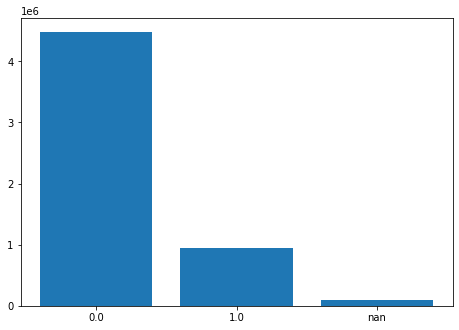

In [ ]:
'''
dist = pd.DataFrame()
data = train.D_143.value_counts().sort_index().to_pandas()
dist['value'] = [str(x) for x in data.index.values]
dist['freq'] = data.values

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = dist.value.values
students = dist.freq.values
ax.bar(langs,students)
plt.show()
'''

# Correlation of Variables


## Culstering Functions

In [ ]:
def perform_clustering(corr, clusters = None, limit = 0.8):
    if clusters is None:
        corr = 1 - abs(corr)
        clusters = list(map(lambda x: [x], corr.columns))
    max_val = 1 - limit
    cl = []
    for i in range(len(clusters)-1):
        for j in range(i+1, len(clusters)):
            avg_dist = 0
            for el1 in clusters[i]:
                for el2 in clusters[j]:
                    avg_dist += corr[el1][el2]
            avg_dist /= len(clusters[i])*len(clusters[j])
            if avg_dist <= max_val:
                max_val = avg_dist
                cl = [i,j]
    if len(cl)>1:
        clusters[cl[0]] += clusters[cl[1]]
        del clusters[cl[1]]
        clusters = perform_clustering(corr, clusters, limit)

    return clusters
    
def elect_members(corr, clusters):
    members = []
    corr = 1 - abs(corr)
    for cl in clusters:
        min_v = 0
        element = cl[0]
        if len(cl)!=1:
            for el1 in cl:
                v = 0            
                for el2 in cl:
                    v+=corr[el1][el2]
                if v >= min_v:
                    min_v = v
                    element = el1
        members.append(element)
    return members

def plot_confusion_matrix(y_true, y_pred):
    plt.figure(figsize=(8, 8))
    cf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".2f")
    ax.set_title('PD Classification Confusion Matrix\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('\nActual Values ')
    ax.xaxis.set_ticklabels(['No Tornado', 'Tornado'])
    ax.yaxis.set_ticklabels(['No Tornado', 'Tornado'])
    plt.show()

## Find uncorrelated members

In [ ]:
members, pre_mem = members.copy(), []

while len(members) != len(pre_mem):

  start   = 0
  pre_mem = members.copy()
  members = []
  jump    = int(np.floor(len(pre_mem)/5))
  random.shuffle(pre_mem)

  for end in [jump, jump*2, jump*3, jump*4] + [len(pre_mem)]:

    print(f'From {start} to {end}.')

    corr_train = train[pre_mem[start:end]].corr()
    clusters   = perform_clustering(corr_train, limit = 0.8)
    members    += elect_members(corr_train, clusters)
  
    start = end
  
  print(f'New size: {len(members)}. Old size: {len(pre_mem)}')
  del corr_train

  

In [ ]:
corr_train = train[pre_mem[start:end]].corr()
clusters   = perform_clustering(corr_train, limit = 0.8)
members    += elect_members(corr_train, clusters)

plt.figure(figsize=(20,10))
corr_num = train[members].corr()
sns.heatmap(corr_num)


## find categorial uncorrelated members

In [ ]:
'''
members_cat = []
corr_train  = train[cat_features].corr()
clusters    = perform_clustering(corr_train, limit = 0.8)
members_cat += elect_members(corr_train, clusters)
  
print(f'New size: {len(members_cat)}. Old size: {len(cat_features)}')
'''


In [ ]:
'''
plt.figure(figsize=(20,10))
corr_cat = train[members_cat].corr()
sns.heatmap(corr_cat)
'''

In [ ]:
'''
corr_cat.min().min()
'''

In [ ]:
'''
corr_cat.applymap(lambda x: 0.8 < x < 0.99).sum().sum()
'''

# Short - Long Customer

# Find binary variables

In [ ]:
bin_alge_train = []
bin_alge_test  = []

for feature in train.columns:

  if len(train[feature].unique()) == 2:

    bin_alge_train.append(feature)
  
  if len(test[feature].unique()) == 2:

    bin_alge_test.append(feature)

In [ ]:
list(zip(bin_alge_train, bin_alge_test))

[('R_2', 'R_2'),
 ('S_6', 'S_6'),
 ('R_4', 'R_4'),
 ('R_15', 'D_66'),
 ('S_18', 'R_15'),
 ('D_86', 'S_18'),
 ('D_87', 'D_87'),
 ('B_31', 'B_31'),
 ('R_19', 'R_19'),
 ('B_32', 'B_32'),
 ('S_20', 'S_20'),
 ('R_21', 'R_21'),
 ('R_22', 'R_22'),
 ('R_23', 'R_23'),
 ('D_93', 'D_93'),
 ('D_94', 'D_94'),
 ('R_24', 'R_24'),
 ('R_25', 'R_25'),
 ('D_96', 'D_96'),
 ('D_127', 'D_127'),
 ('R_28', 'R_28')]

In [ ]:
train[bin_alge_train].isna().sum()

R_2            0
S_6            0
R_4            0
R_15           0
S_18           0
D_86           0
D_87     5527586
B_31           0
R_19           0
B_32           0
S_20           0
R_21           0
R_22           0
R_23           0
D_93           0
D_94           0
R_24           0
R_25           0
D_96           0
D_127          0
R_28           0
dtype: int64

In [ ]:
test[bin_alge_train].isna().sum()

R_2             0
S_6             0
R_4             0
R_15            0
S_18            0
D_86         1067
D_87     11352790
B_31            0
R_19            0
B_32            0
S_20            0
R_21            0
R_22            0
R_23            0
D_93            0
D_94            0
R_24            0
R_25            0
D_96            0
D_127           0
R_28            0
dtype: int64

In [ ]:
train.D_87.value_counts(dropna=False)

NaN    5527586
1.0       3865
Name: D_87, dtype: int64

In [ ]:
targets.loc[train.loc[train.D_87 == 1].customer_ID.values].mean()

target    0.867012
dtype: float64

In [ ]:
train.loc[train.D_87.isna(), 'D_87'] = 0
test.loc[test.D_87.isna(), 'D_87'] = 0

In [ ]:
train.D_87.value_counts(dropna=False)

0.0    5527586
1.0       3865
Name: D_87, dtype: int64

In [ ]:
test.D_86.value_counts(dropna=False)

0.0    11015162
1.0      347533
NaN        1067
Name: D_86, dtype: int64

In [ ]:
targets.loc[train.loc[train.D_86 == 1].customer_ID.values].mean()

target    0.090398
dtype: float64

In [ ]:
test.loc[test.D_86.isna(), 'D_86'] = 0

In [ ]:
train[bin_alge_train].isna().sum()

R_2      0
S_6      0
R_4      0
R_15     0
S_18     0
D_86     0
D_87     0
B_31     0
R_19     0
B_32     0
S_20     0
R_21     0
R_22     0
R_23     0
D_93     0
D_94     0
R_24     0
R_25     0
D_96     0
D_127    0
R_28     0
dtype: int64

In [ ]:
test[bin_alge_train].isna().sum()

R_2      0
S_6      0
R_4      0
R_15     0
S_18     0
D_86     0
D_87     0
B_31     0
R_19     0
B_32     0
S_20     0
R_21     0
R_22     0
R_23     0
D_93     0
D_94     0
R_24     0
R_25     0
D_96     0
D_127    0
R_28     0
dtype: int64

In [ ]:
trin_alge_train = []
trin_alge_test  = []

for feature in train.columns:

  if len(train[feature].unique()) == 3:

    trin_alge_train.append(feature)
  
  if len(test[feature].unique()) == 3:

    trin_alge_test.append(feature)

list(zip(trin_alge_train, trin_alge_test))

[('D_66', 'D_86'),
 ('B_33', 'B_33'),
 ('D_92', 'D_92'),
 ('D_103', 'D_103'),
 ('R_27', 'R_27'),
 ('D_109', 'D_109'),
 ('D_114', 'D_114'),
 ('D_116', 'D_116'),
 ('D_120', 'D_120'),
 ('D_129', 'D_129'),
 ('D_135', 'D_135'),
 ('D_137', 'D_137'),
 ('D_139', 'D_139'),
 ('D_140', 'D_140'),
 ('D_143', 'D_143')]

In [ ]:
train[trin_alge_train].isna().sum() #D_66.value_counts(dropna=False)

D_66     0
B_33     0
D_92     0
D_103    0
R_27     0
D_109    0
D_114    0
D_116    0
D_120    0
D_129    0
D_135    0
D_137    0
D_139    0
D_140    0
D_143    0
dtype: int64

In [ ]:
test[trin_alge_train].isna().sum()

D_66     0
B_33     0
D_92     0
D_103    0
R_27     0
D_109    0
D_114    0
D_116    0
D_120    0
D_129    0
D_135    0
D_137    0
D_139    0
D_140    0
D_143    0
dtype: int64

In [ ]:
featu = 'D_143'

In [ ]:
train[featu].value_counts(dropna=False)

0.0    4486175
1.0     943728
NaN     101548
Name: D_143, dtype: int64

In [ ]:
targets.loc[train.loc[train[featu]==0].customer_ID.values].mean()

target    0.221816
dtype: float64

In [ ]:
targets.loc[train.loc[train[featu]==1].customer_ID.values].mean()

target    0.367104
dtype: float64

In [ ]:
targets.loc[train.loc[train[featu].isna()].customer_ID.values].mean()

target    0.357624
dtype: float64

In [ ]:
train.loc[train[featu].isna(), featu] = 2
test.loc[test[featu].isna(), featu] = 2

In [ ]:
bin_alge_train + trin_alge_train

['R_2',
 'S_6',
 'R_4',
 'R_15',
 'S_18',
 'D_86',
 'D_87',
 'B_31',
 'R_19',
 'B_32',
 'S_20',
 'R_21',
 'R_22',
 'R_23',
 'D_93',
 'D_94',
 'R_24',
 'R_25',
 'D_96',
 'D_127',
 'R_28',
 'D_66',
 'B_33',
 'D_92',
 'D_103',
 'R_27',
 'D_109',
 'D_114',
 'D_116',
 'D_120',
 'D_129',
 'D_135',
 'D_137',
 'D_139',
 'D_140',
 'D_143']

In [ ]:
cat_features

['B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [ ]:
train[cat_features].isna().sum()

B_30     0
B_38     0
D_114    0
D_116    0
D_117    0
D_120    0
D_126    0
D_63     0
D_64     0
D_66     0
D_68     0
dtype: int64

In [ ]:
test[cat_features].isna().sum()

B_30     0
B_38     0
D_114    0
D_116    0
D_117    0
D_120    0
D_126    0
D_63     0
D_64     0
D_66     0
D_68     0
dtype: int64

In [ ]:
featu = 'D_68'
train[featu].value_counts(dropna=False)

6.0    2782455
5.0    1201706
3.0     484442
4.0     477187
2.0     220111
7.0     216503
1.0     133122
0.0      15925
Name: D_68, dtype: int64

In [ ]:
train.loc[train[featu].isna(), featu] = 7
test.loc[test[featu].isna(), featu] = 7

In [ ]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'R_2', 'S_6', 'R_4', 'R_15', 'S_18', 'D_86', 'D_87', 'B_31', 'R_19', 'B_32', 'S_20', 'R_21', 'R_22', 'R_23', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'D_127', 'R_28', 'D_66', 'B_33', 'D_92', 'D_103', 'R_27', 'D_109', 'D_114', 'D_116', 'D_120', 'D_129', 'D_135', 'D_137', 'D_139', 'D_140', 'D_143']

In [ ]:
for feature in cat_features:

  train[feature] = train[feature].astype('int8')
  test[feature]  = test[feature].astype('int8')

In [ ]:
train.to_parquet(train_dir)
test.to_parquet(test_dir)